In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
#from keybert import KeyBERT
import yake
import string
import numpy as np

In [2]:
sds_data = pd.read_csv('../data/sds_ds_text.csv')
sds_non_data = pd.read_csv('../data/sds_nds_text.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Generating keywords for Data Science Episodes

In [3]:
sds_ds_processed = pd.DataFrame(sds_data.groupby(['episode_number', 'episode_name', 'length_episode', 'class', 'guest_name', 'host_episode', 'episode_year'])['episode_split_text'].agg(lambda x: ' '.join(str(i) for i in x))).reset_index()

<IPython.core.display.Javascript object>

In [4]:
sds_ds_processed

,episode_number,episode_name,length_episode,class,guest_name,host_episode,episode_year,episode_split_text
0,1,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Database,Ruben Kogel,Kirill Eremenko,2016,This is episode number one with ex-chemical en...
1,2,"Machine Learning, Recommender Systems and the...",51,Machine Learning,Hadelin de Ponteves,Kirill Eremenko,2016,This is session number two with machine learni...
2,3,"Defining the Data Problem, Data Science in Ma...",53,Machine Learning,Dr. Wilson Pok,Kirill Eremenko,2016,This is episode number three with Nanophysics ...
3,4,"Data and Strategy, three Pillars of Research ...",60,Data Science,Brendan Hogan,Kirill Eremenko,2016,This is episode four with business strategy ex...
4,5,"Computer Forensics, Fraud Analytics and knowi...",63,Data Science,Dmitry Korneev,Kirill Eremenko,2016,This is episode number five with forensics inv...
...,...,...,...,...,...,...,...,...
446,679,"The A.I. and Machine Learning Landscape, with...",94,Artificial Intelligence,George Mathew,Jon Krohn,2023,This is episode number 679 with George Matthew...
447,680,Automating Industrial Machines with Data Scie...,30,Data Science,Allegra Alessi,Jon Krohn,2023,This is episode number 680 with Allegra Alessi...
448,681,XGBoost,72,Machine Learning,Matt Harrison,Jon Krohn,2023,"This is episode number 681 with Matt Harrison,..."
449,682,"Business Intelligence Tools, with Mico Yuk",28,Data Science,Mico Yuk,Jon Krohn,2023,"This is episode number 682 with Mico Yuk, host..."


In [ ]:
# Remove episode 202 and 546 with no text in episode_split_text
#sds_processed = 
#sds_ds_processed[sds_ds_processed['episode_split_text'] == 'nan']#.reset_index(drop = True)

In [5]:
# Function to clean the text 
def processed_text(text):  
    # Lowercase the text
    text = text.lower()
    # Remove punctuation from the text
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove digits from the text
    text = ''.join(char for char in text if not char.isdigit())
    return text

In [6]:
sds_ds_processed['episode_split_text'] = sds_ds_processed['episode_split_text'].apply(processed_text)

In [11]:
sds_ds_processed['episode_split_text'].loc[400]

'this is episode number  with luke barousse of the eponymous data analytics youtube channel this episode is brought to you by iterative your mission control center for machine learningwelcome to the super data science podcast the most listenedto podcast in the data science industry each week we bring you inspiring people and ideas to help you build a successful career in data science im your host jon krohn thanks for joining me today and now lets make the complex simplewelcome back to the super data science podcast weve got the tremendous luke barousse on the show today luke is a fulltime youtuber creating highly educational but nevertheless often hilarious videos on data analytics for his enormous audience of over a quarter million subscribers previously luke worked as a lead data analyst and data engineer at basf the global chemical manufacturing giant before kicking off his career in industry he worked for seven years in the us navy on nuclear powered submarines and he holds a degre

In [12]:
sds_ds_processed['episode_keywords'] = None

In [13]:
# Function to generate 100 keywords per episode using Yake library to store keywords in one column as list
def yake_keyword_extractor(doc):
    global sds_ds_processed
    
    for i, episode_text in doc.iteritems():
        max_ngram_size = 3
        deduplication_threshold = 0.3
        windowSize = 1
        numOfKeywords = 100
        kw_extractor = yake.KeywordExtractor(n = max_ngram_size, dedupLim = deduplication_threshold , windowsSize = windowSize, top = numOfKeywords)
        keywords = kw_extractor.extract_keywords(episode_text)
        sds_ds_processed.at[i, 'episode_keywords'] = keywords

In [14]:
yake_keyword_extractor(sds_ds_processed['episode_split_text'])

In [15]:
sds_ds_processed

,episode_number,episode_name,length_episode,class,guest_name,host_episode,episode_year,episode_split_text,episode_keywords
0,1,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Database,Ruben Kogel,Kirill Eremenko,2016,this is episode number one with exchemical eng...,"[(data science, 5.201241348387194e-06), (eleme..."
1,2,"Machine Learning, Recommender Systems and the...",51,Machine Learning,Hadelin de Ponteves,Kirill Eremenko,2016,this is session number two with machine learni...,"[(machine learning machine, 2.506258710542196e..."
2,3,"Defining the Data Problem, Data Science in Ma...",53,Machine Learning,Dr. Wilson Pok,Kirill Eremenko,2016,this is episode number three with nanophysics ...,"[(data science podcast, 4.651681915765842e-06)..."
3,4,"Data and Strategy, three Pillars of Research ...",60,Data Science,Brendan Hogan,Kirill Eremenko,2016,this is episode four with business strategy ex...,"[(data scientist role, 4.206800003765128e-06),..."
4,5,"Computer Forensics, Fraud Analytics and knowi...",63,Data Science,Dmitry Korneev,Kirill Eremenko,2016,this is episode number five with forensics inv...,"[(unstructured data analytics, 7.2255270954093..."
...,...,...,...,...,...,...,...,...,...
446,679,"The A.I. and Machine Learning Landscape, with...",94,Artificial Intelligence,George Mathew,Jon Krohn,2023,this is episode number with george matthew ma...,"[(product market fit, 2.3243289496297082e-06),..."
447,680,Automating Industrial Machines with Data Scie...,30,Data Science,Allegra Alessi,Jon Krohn,2023,this is episode number with allegra alessi io...,"[(product owner role, 6.017532439633584e-06), ..."
448,681,XGBoost,72,Machine Learning,Matt Harrison,Jon Krohn,2023,this is episode number with matt harrison man...,"[(xgboost model yeah, 4.032379247073571e-06), ..."
449,682,"Business Intelligence Tools, with Mico Yuk",28,Data Science,Mico Yuk,Jon Krohn,2023,this is episode number with mico yuk host of ...,"[(yeah yeah yeah, 1.3697862978155252e-06), (da..."


In [16]:
def tuple_extractor(row):
    words = [t[0].replace(" ", "_") for t in row]
    return " ".join(words)

In [17]:
sds_ds_processed['keywords'] = sds_ds_processed['episode_keywords'].apply(tuple_extractor)

In [18]:
sds_ds_processed

,episode_number,episode_name,length_episode,class,guest_name,host_episode,episode_year,episode_split_text,episode_keywords,keywords
0,1,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Database,Ruben Kogel,Kirill Eremenko,2016,this is episode number one with exchemical eng...,"[(data science, 5.201241348387194e-06), (eleme...",data_science elemental_data_problems science_s...
1,2,"Machine Learning, Recommender Systems and the...",51,Machine Learning,Hadelin de Ponteves,Kirill Eremenko,2016,this is session number two with machine learni...,"[(machine learning machine, 2.506258710542196e...",machine_learning_machine data_data_science lea...
2,3,"Defining the Data Problem, Data Science in Ma...",53,Machine Learning,Dr. Wilson Pok,Kirill Eremenko,2016,this is episode number three with nanophysics ...,"[(data science podcast, 4.651681915765842e-06)...",data_science_podcast approach_data_science ’re...
3,4,"Data and Strategy, three Pillars of Research ...",60,Data Science,Brendan Hogan,Kirill Eremenko,2016,this is episode four with business strategy ex...,"[(data scientist role, 4.206800003765128e-06),...",data_scientist_role research_youre_working sup...
4,5,"Computer Forensics, Fraud Analytics and knowi...",63,Data Science,Dmitry Korneev,Kirill Eremenko,2016,this is episode number five with forensics inv...,"[(unstructured data analytics, 7.2255270954093...",unstructured_data_analytics data_analytics_tec...
...,...,...,...,...,...,...,...,...,...,...
446,679,"The A.I. and Machine Learning Landscape, with...",94,Artificial Intelligence,George Mathew,Jon Krohn,2023,this is episode number with george matthew ma...,"[(product market fit, 2.3243289496297082e-06),...",product_market_fit large_language_models data_...
447,680,Automating Industrial Machines with Data Scie...,30,Data Science,Allegra Alessi,Jon Krohn,2023,this is episode number with allegra alessi io...,"[(product owner role, 6.017532439633584e-06), ...",product_owner_role data_scienceoriented_produc...
448,681,XGBoost,72,Machine Learning,Matt Harrison,Jon Krohn,2023,this is episode number with matt harrison man...,"[(xgboost model yeah, 4.032379247073571e-06), ...",xgboost_model_yeah decision_tree_models book_e...
449,682,"Business Intelligence Tools, with Mico Yuk",28,Data Science,Mico Yuk,Jon Krohn,2023,this is episode number with mico yuk host of ...,"[(yeah yeah yeah, 1.3697862978155252e-06), (da...",yeah_yeah_yeah data_storytelling_framework ana...


In [19]:
sds_ds_processed.to_csv('../data/sds_ds_keywords.csv', index = False)

## Generating keywords for non-Data Science Episodes

In [ ]:
sds_nds_processed = pd.DataFrame(sds_non_data.groupby(['episode_number', 'episode_name', 'length_episode', 'context_episode', 'guest_name', 'host_episode', 'episode_year'])['episode_split_text'].agg(lambda x: ' '.join(str(i) for i in x))).reset_index()

In [ ]:
sds_nds_processed['episode_split_text'] = sds_nds_processed['episode_split_text'].apply(processed_text)

In [ ]:
sds_nds_processed['episode_keywords'] = None

In [ ]:
# Function to generate 100 keywords per episode using Yake library to store keywords in one column as list
def yake_keyword_extractor(doc):
    global sds_nds_processed
    
    for i, episode_text in doc.iteritems():
        max_ngram_size = 3
        deduplication_threshold = 0.3
        windowSize = 1
        numOfKeywords = 100
        kw_extractor = yake.KeywordExtractor(n = max_ngram_size, dedupLim = deduplication_threshold , windowsSize = windowSize, top = numOfKeywords)
        keywords = kw_extractor.extract_keywords(episode_text)
        sds_nds_processed.at[i, 'episode_keywords'] = keywords

In [ ]:
yake_keyword_extractor(sds_nds_processed['episode_split_text'])

In [ ]:
sds_nds_processed['keywords'] = sds_nds_processed['episode_keywords'].apply(tuple_extractor)

In [ ]:
sds_nds_processed

In [ ]:
sds_nds_processed.to_csv('../data/sds_nds_keywords.csv', index = False)

### Count Vectorizer and Class-Based Tfidf

In [20]:
import scipy.sparse as sp
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.preprocessing import normalize

In [22]:
sds_ds_keywords = pd.read_csv('../data/sds_ds_keywords.csv')

keywords_per_class = sds_ds_keywords.groupby('class')['keywords'].apply(' '.join).reset_index()

# Rename the columns to match the original code
keywords_per_class = keywords_per_class.rename(columns={'class': 'Class', 'keywords': 'Document'})

<IPython.core.display.Javascript object>

In [23]:
keywords_per_class

,Class,Document
0,Artificial Intelligence,data_science_work governments_data_science sci...
1,"Artificial Intelligence, Deep Learning",kaggle_competitions_basically people_basically...
2,Blockchain,blockchain_yeah_yeah basically_apply_blockchai...
3,Data Science,data_scientist_role research_youre_working sup...
4,"Data Science, Career",data_science_interview super_data_science sql_...
5,"Data Science, Productivity",yeah_yeah_yeah science_machine_learning learni...
6,Data Visualization,learning_data_science data_science_journey dat...
7,Database,data_science elemental_data_problems science_s...
8,Deep Learning,machine_learning_models data_science_machine y...
9,Machine Learning,machine_learning_machine data_data_science lea...


In [24]:
class CTFIDFVectorizer(TfidfTransformer):
    def __init__(self, *args, **kwargs):
        super(CTFIDFVectorizer, self).__init__(*args, **kwargs)

    def fit(self, X: sp.csr_matrix, n_samples: int):
        """Learn the idf vector (global term weights) """
        _, n_features = X.shape
        df = np.squeeze(np.asarray(X.sum(axis=0)))
        idf = np.log(n_samples / df)
        self._idf_diag = sp.diags(idf, offsets=0,
                                  shape=(n_features, n_features),
                                  format='csr',
                                  dtype=np.float64)
        return self

    def transform(self, X: sp.csr_matrix) -> sp.csr_matrix:
        """Transform a count-based matrix to c-TF-IDF """
        X = X * self._idf_diag
        X = normalize(X, axis=1, norm='l1', copy=False)
        return X

In [25]:
# Create c-TF-IDF
count = CountVectorizer().fit_transform(keywords_per_class.Document)
ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(keywords_per_class)).toarray()

In [26]:
# Create bag of words using count vectorizer
count_vectorizer = CountVectorizer().fit(keywords_per_class.Document)
count = count_vectorizer.transform(keywords_per_class.Document)
words = count_vectorizer.get_feature_names_out()

In [27]:
count_vectorizer.vocabulary_

{'data_science_work': 6475,
 'governments_data_science': 11407,
 'science_data_collection': 23570,
 'work_programmers_data': 30218,
 'left_brain_people': 15791,
 'people_indecipherable_things': 19756,
 've_read_bits': 29266,
 'unsupervised_learning_works': 28995,
 'taxpayers': 26826,
 '_money_governments': 5,
 'main_things_today': 16785,
 'show_notes_yeah': 24234,
 'arts_yeah_yay': 1458,
 'yeah_yay_good': 30687,
 'data_analytics_capabilitiesand': 6264,
 'departments_performing_business': 6933,
 'technical_left_brain': 26944,
 'university_studies_interesting': 28938,
 'tax_office_inaudible': 26822,
 'data': 6249,
 'providing_online_services': 21574,
 'good_bacteria_probiotic': 11103,
 'photography_sculpture_painting': 20107,
 'latest_technology_implement': 15533,
 'huge_competitive_edgeon': 12894,
 'lot': 16380,
 'inanimate_objects_anymore': 13518,
 'published_isaac_newton': 21648,
 'work': 30172,
 'subject_matter_experts': 26031,
 'high_low_close': 12515,
 'shen_henry_wang': 24110,
 'b

In [28]:
len(count_vectorizer.vocabulary_)

31155

In [29]:
count.shape

(15, 31155)

In [30]:
word_counts = pd.DataFrame({
    'words': count_vectorizer.get_feature_names_out(),
    'frequency': np.array(count.sum(axis = 0)).flatten()
})
word_counts.sort_values('frequency', ascending = False)

<IPython.core.display.Javascript object>

,words,frequency
6249,data,368
30548,yeah,254
16380,lot,193
27743,time,189
24177,show,176
...,...,...
10769,gdpr_legal_services,1
10768,gdpr_global,1
10767,gdpr,1
10765,gdansk_university,1


In [31]:
word_counts[word_counts['frequency'] < 5]

,words,frequency
0,_affairs,1
1,_capacity_enabling,1
2,_digital,1
3,_guys,1
4,_hands,1
...,...,...
31150,zuckerberg_gray,1
31151,zuckerbergthe_fourth_mentor,1
31152,zurich,1
31153,zurich_in_switzerland,1


In [32]:
# class based tfidf
ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(keywords_per_class)).toarray()

In [44]:
# find unique words in each class
unique_words_per_class = []
for i, class_docs in enumerate(keywords_per_class.Document):
    tfidf_scores = ctfidf[i]
    unique_word_indices = np.argsort(tfidf_scores)[-20:][::-1]  # index
    unique_words = [words[idx] for idx in unique_word_indices]  # feature name
    unique_words_per_class.append(unique_words)

class_unique_25 = pd.DataFrame({'Class': keywords_per_class.Class, 'unique_Words': unique_words_per_class})


<IPython.core.display.Javascript object>

In [45]:
class_unique_25

,Class,unique_Words
0,Artificial Intelligence,"[agi, capacity, optimal, tasks, influential_sc..."
1,"Artificial Intelligence, Deep Learning","[atari_video_games, deep_learning_illustrated,..."
2,Blockchain,"[funds_check_youre, interactive_data_apps, cal..."
3,Data Science,"[running, minute_friday_episode, time_happy, p..."
4,"Data Science, Career","[facilitates_team_productivity, interested_in_..."
5,"Data Science, Productivity","[matrix, todays_episode_mariya, lot_hashtag_st..."
6,Data Visualization,"[chart, qlik, good_day, slack_channel, andy, p..."
7,Database,"[flow, tend_to_gravitate, ruben, understand_ha..."
8,Deep Learning,"[real_time_quality, run_today, learning_data_e..."
9,Machine Learning,"[project_youre_working, gpus, gradient_boostin..."


In [ ]:
class_unique_20['unique_Words'].loc[0]

In [ ]:
class_unique_20['Class'].unique()

In [34]:
class_unique_20.to_csv('../data/keywords_u20.csv')

### Generate word cloud

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

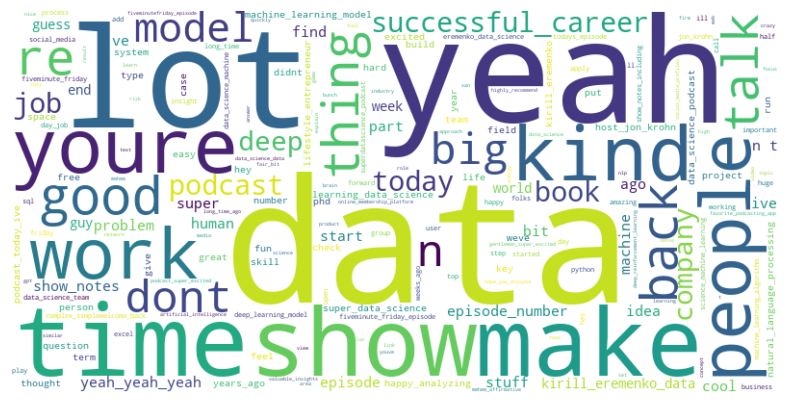

In [41]:

all_keywords = ' '.join(keywords_per_class.Document)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

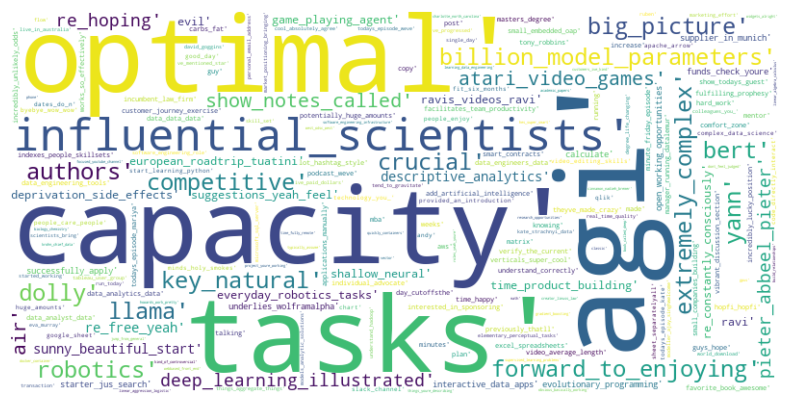

In [50]:
all_keywords = ' '.join(map(str, class_unique_25.unique_Words))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
# Function to generate 100 keywords per episode using Yake library if keywords need to be separate columns

def yake_keyword_extractor(doc):
    global sds_processed

    for i, episode_text in doc.iteritems():
        max_ngram_size = 3
        deduplication_threshold = 0.3
        windowSize = 1
        numOfKeywords = 100
        kw_extractor = yake.KeywordExtractor(n=max_ngram_size, dedupLim=deduplication_threshold, windowsSize=windowSize, top=numOfKeywords)
        keywords = kw_extractor.extract_keywords(episode_text)

        # Create separate columns for each keyword
        for j, keyword in enumerate(keywords):
            column_name = f'episode_keyword{j+1}'
            sds_processed.at[i, column_name] = keyword[0]  # Store the keyword value in the respective column

In [ ]:
def keyword_extractor(doc):
    kw_model = KeyBERT()
    global sds_processed
    stopwords = list(STOP_WORDS)
    
    for i, episode_text in doc.iteritems():
        keywords = kw_model.extract_keywords(episode_text, keyphrase_ngram_range=(1, 1), stop_words = stopwords, top_n = 100, use_mmr=True, diversity=0.7)
        sds_processed.at[i, 'episode_keywords'] = keywords

In [ ]:
# https://maartengr.github.io/BERTopic/index.html